<a href="https://colab.research.google.com/github/AyeshaIjazTabassum/PythonAIBootcamp/blob/main/Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.** **CNN (Convolutional Neural Networks)**
  - Project :Cat vs Dog Image Classifier
  - Dataset: Kaggle Cats vs Dogs
  - Goal: Binary image classification

In [1]:
# importing libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
# unzip the dataset
!unzip catsvsdogs.zip

Streaming output truncated to the last 5000 lines.
  inflating: catsvsdogs/train/dogs/dog.4419.jpg  
  inflating: catsvsdogs/train/dogs/dog.442.jpg  
  inflating: catsvsdogs/train/dogs/dog.4420.jpg  
  inflating: catsvsdogs/train/dogs/dog.4421.jpg  
  inflating: catsvsdogs/train/dogs/dog.4422.jpg  
  inflating: catsvsdogs/train/dogs/dog.4424.jpg  
  inflating: catsvsdogs/train/dogs/dog.4425.jpg  
  inflating: catsvsdogs/train/dogs/dog.4426.jpg  
  inflating: catsvsdogs/train/dogs/dog.4427.jpg  
  inflating: catsvsdogs/train/dogs/dog.4431.jpg  
  inflating: catsvsdogs/train/dogs/dog.4433.jpg  
  inflating: catsvsdogs/train/dogs/dog.4436.jpg  
  inflating: catsvsdogs/train/dogs/dog.4438.jpg  
  inflating: catsvsdogs/train/dogs/dog.4439.jpg  
  inflating: catsvsdogs/train/dogs/dog.444.jpg  
  inflating: catsvsdogs/train/dogs/dog.4440.jpg  
  inflating: catsvsdogs/train/dogs/dog.4441.jpg  
  inflating: catsvsdogs/train/dogs/dog.4442.jpg  
  inflating: catsvsdogs/train/dogs/dog.4443.jpg  
 

In [3]:
# data preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,          # normalize pixel values
    rotation_range=20,       # rotate images
    zoom_range=0.2,          # zoom images
    shear_range=0.2,         # shear transformation
    horizontal_flip=True    # flip images
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)

In [4]:
# data loading
train_data = train_datagen.flow_from_directory(
    '/content/catsvsdogs/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_data = test_datagen.flow_from_directory(
    '/content/catsvsdogs/test',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [5]:
# cnn model
model = Sequential()

# convolution block 1
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())

# convolution block 2
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())

# convolution block 3
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())

# fully connected layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))      # prevent overfitting
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [7]:
# model training
history = model.fit(
    train_data,
    epochs=10,
    validation_data=test_data
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 158s 237ms/step - accuracy: 0.6152 - loss: 3.0249 - val_accuracy: 0.7066 - val_loss: 0.5615
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 145s 231ms/step - accuracy: 0.7360 - loss: 0.5370 - val_accuracy: 0.7718 - val_loss: 0.4949
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 142s 228ms/step - accuracy: 0.7647 - loss: 0.4941 - val_accuracy: 0.7802 - val_loss: 0.4618
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 143s 229ms/step - accuracy: 0.7826 - loss: 0.4619 - val_accuracy: 0.7402 - val_loss: 0.5323
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 143s 229ms/step - accuracy: 0.7957 - loss: 0.4425 - val_accuracy: 0.7936 - val_loss: 0.4592
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 145s 232ms/step - accuracy: 0.8120 - loss: 0.4243 - val_accuracy: 0.8032 - val_loss: 0.4386
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 143s 229ms/step - accuracy: 0.8337 - loss: 0.3859 - val_accuracy: 0.8052 - val_loss: 0.4180
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 144s 230ms/step - accuracy: 0.8506 -

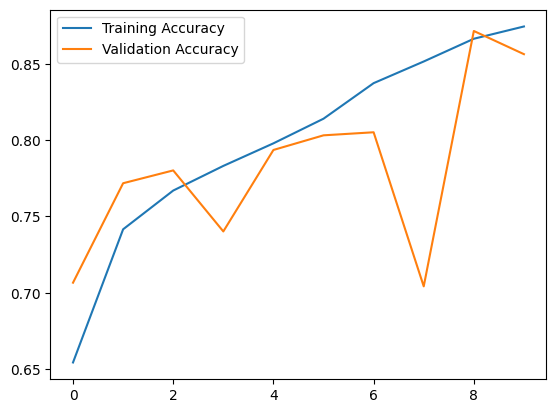

In [8]:
# plotting accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

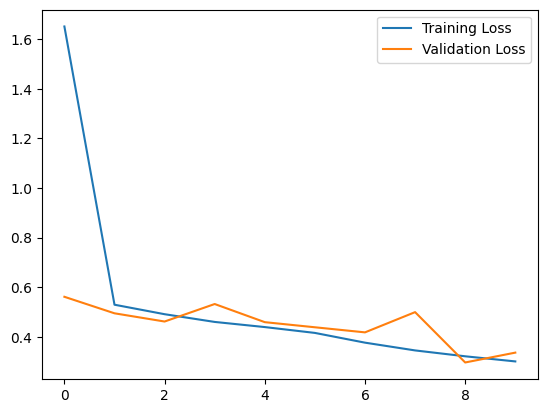

In [9]:
# plotting loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

**2.** **Transfer Learning**
  - Project : Flower Species Classification
  - Dataset: TensorFlow Flowers Dataset
  - Model: MobileNetV2 / ResNet50 (pretrained)

In [118]:
# import libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [119]:
# loading dataset
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

data_dir = tf.keras.utils.get_file(
    "flower_photos",
    origin=dataset_url,
    untar=True
)

In [120]:
# setting parameters of dataset
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
SEED = 123

In [121]:
# loading and splitting training and validation data
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

Found 3670 files belonging to 1 classes.
Using 2936 files for training.
Found 3670 files belonging to 1 classes.
Using 734 files for validation.


In [122]:
# data augmentation
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

In [123]:
# preprocessing
preprocess_input = tf.keras.applications.resnet.preprocess_input

In [124]:
# data augnmentation
def augment(images, labels):
    images = data_augmentation(images)
    images = preprocess_input(images)
    return images, labels

def preprocess(images, labels):
    images = preprocess_input(images)
    return images, labels

train_ds = train_ds.map(augment, num_parallel_calls=tf.data.AUTOTUNE)
val_ds = val_ds.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)

In [125]:
# loading pretrained ResNet50
base_model = tf.keras.applications.ResNet50(
    weights="imagenet",
    include_top=False,
    input_shape=(224, 224, 3)
)

base_model.trainable = False

In [126]:
# model
model = keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(5, activation='softmax')
])

In [127]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [128]:
# training model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5
)

Epoch 1/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 56s 479ms/step - accuracy: 0.1609 - loss: 2.8712 - val_accuracy: 0.7643 - val_loss: 0.8520
Epoch 2/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 35s 378ms/step - accuracy: 0.6587 - loss: 0.9009 - val_accuracy: 0.9918 - val_loss: 0.2412
Epoch 3/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 35s 372ms/step - accuracy: 0.8746 - loss: 0.3480 - val_accuracy: 1.0000 - val_loss: 0.0755
Epoch 4/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 41s 371ms/step - accuracy: 0.9618 - loss: 0.1584 - val_accuracy: 1.0000 - val_loss: 0.0315
Epoch 5/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 42s 379ms/step - accuracy: 0.9631 - loss: 0.1233 - val_accuracy: 1.0000 - val_loss: 0.0154


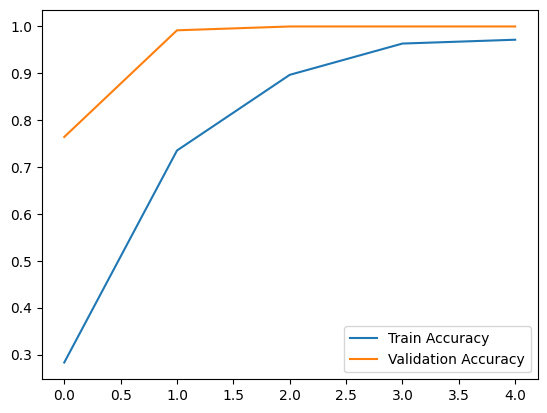

In [129]:
# plotting accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

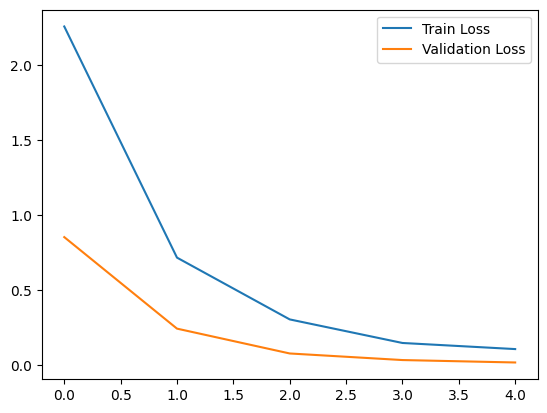

In [130]:
# plotting loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

**3. NLP Project**
  - Project : Spam Email / SMS Detection
  - Dataset: SMS Spam Collection
  - Goal: Spam vs Ham
  - Bag of Words / TF-IDF
  - Naive Bayes / Logistic Regression

In [107]:
# importing libraries
import pandas as pd
import numpy as np

import re
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [108]:
# loading dataset
df = pd.read_csv(
    "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv",
    sep='\t',
    header=None,
    names=['label', 'message']
)

In [109]:
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [110]:
# encoding labels
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [111]:
# preprocessing text
ps = PorterStemmer()
corpus = []

for msg in df['message']:
    msg = re.sub('[^a-zA-Z]', ' ', msg)   # remove symbols
    msg = msg.lower()
    msg = msg.split()
    msg = [ps.stem(word) for word in msg if word not in stopwords.words('english')]
    msg = ' '.join(msg)
    corpus.append(msg)

In [112]:
# bag of words
cv = CountVectorizer(max_features=3000)
x = cv.fit_transform(corpus).toarray()
y = df['label']

In [113]:
# splitting into training and testing
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [114]:
# naive bayes model
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [115]:
# evaluation
y_pred = model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9838565022421525

Confusion Matrix:
 [[955  11]
 [  7 142]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       966
           1       0.93      0.95      0.94       149

    accuracy                           0.98      1115
   macro avg       0.96      0.97      0.97      1115
weighted avg       0.98      0.98      0.98      1115

